# Lecture 29 - The Perceptron continued; Logistic Regression

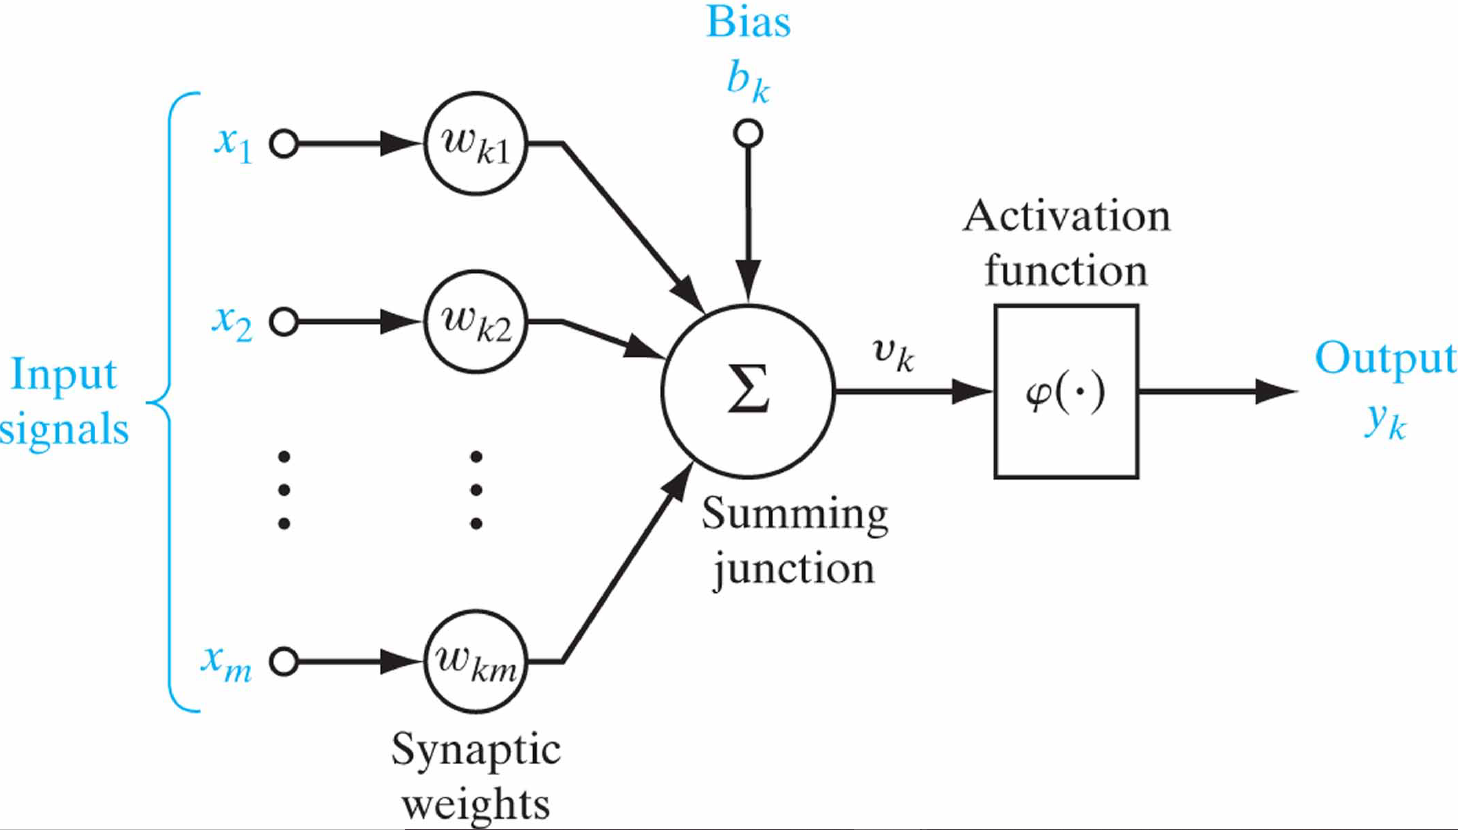

In [1]:
from IPython.display import Image
Image('figures/ModelNeuron.png', width=700)

We can write this mathematically as: 

$$y = \varphi\left(v\right)$$

where 

$$v =  \sum_{j=1}^m w_j x_j + b = \mathbf{w}^T\mathbf{x} + b$$

and $\varphi(x) = \begin{cases}1, & x\geq 0\\ 0, & x<0\end{cases}$
    
* *What does this look like graphically?*

## The Perceptron Algorithm

Consider an alternative error function known as the *perceptron criterion*. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the *stochastic gradient descent* algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

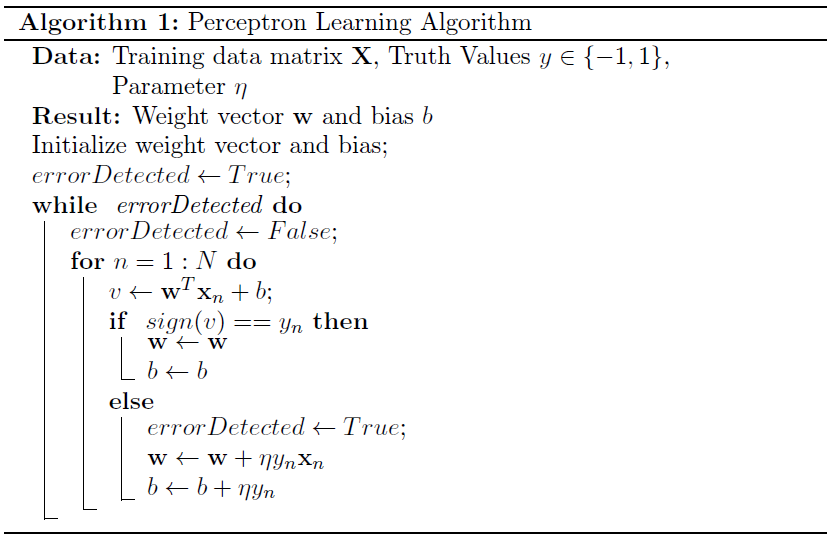

In [2]:
Image('figures/PerceptronLearning.png', width=700)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

def generateMVNRandData(Npts, mu, sigma):
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, range):
    x = np.array(range)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(y,x)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 and epo < nEpochs):
        error = 0
        epo += 1
        for i in range(nPts):
            activation =  data[i,:]@weights
            if np.sign(activation) != labels[i]:
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-2,2]);
                plt.pause(0.5)
    
    print('Final weights:', weights)
    return weights

Initial weights: [0.63632936 0.53920425 0.73824749]


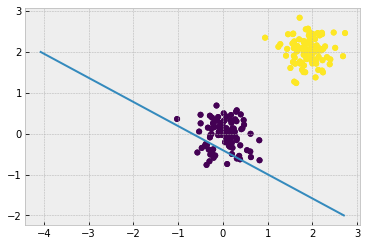

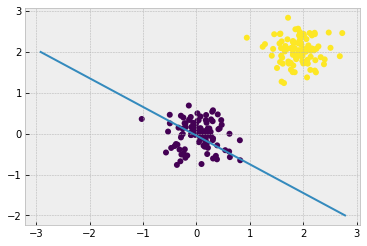

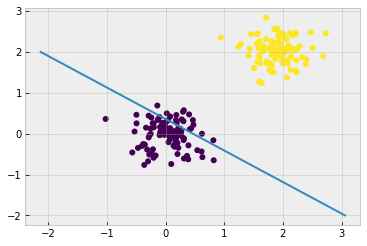

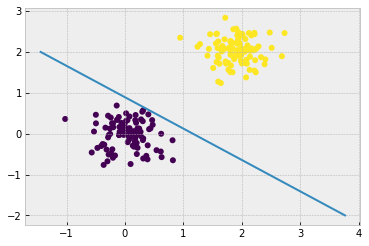

Final weights: [-0.56367064  0.48524598  0.63171112]


In [9]:
Npts  = 100
mu1   = [2,2]
mu2   = [0,0]
var   = .1
eta   = 0.3
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs);

___
### Food for Thought

Questions to consider:

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-0.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).
___

## Perceptron Convergence Theorem

The *Perceptron convergence theorem* states that for any data set which is **linearly separable** the perceptron learning algorithm is **guaranteed to find *a* solution** in a finite number of steps.

* In other words, the Perceptron learning rule is guaranteed to converge to a weight vector that correctly classifies the examples provided the training examples are linearly separable.

# ADALINE (Widrow and Hoff, 1959)

The **ADALINE (Adaptive Linear Neuron)** was introduced in 1959, shortly after Rosenblatt's perceptron, by Bernard Widrow and Ted Hoff (one of the inventors of the **microprocessor**) at Stanford. Widrow and Hoff were **electrical engineers**, yet Widrow had attended the famous Dartmouth workshop on artificial intelligence in 1956, an experience that got him interested in the idea of building brain-like artificial learning systems.

The main difference between the perceptron and the ADALINE is that the later works by minimizing the **mean squared error** of the predictions of a linear function. This means that the learning procedure is based on the outcome of a linear function rather than on the outcome of a threshold function as in the perceptron.

* From a cognitive science perspective, the main contribution of the ADALINE was methodological rather than theoretical.

* The main application of the ADALINE was in adaptive filtering and adaptive signal processing
    * Technologies like adaptive antennas, adaptive noise canceling, and adaptive equalization in high-speed modems (which makes Wifi works well), were developed by using the ADALINE (Widrow & Lehr, 1990).
    
![The ADALINE](https://pabloinsente.github.io/assets/post-6/adaline-math.png)    

Mathematically, learning from the output of a linear function enables the minimization of a continuous **cost or loss function**. Continuous cost functions have the advantage of having "*nice*" derivatives, that facilitate training neural nets by using the **chain rule of calculus**. This change opened the door to train more complex algorithms like non-linear multilayer perceptrons, logistic regression, support vector machines, and others.

Learn more from [The ADALINE](https://pabloinsente.github.io/the-adaline) blog post.

# The First AI Winter

In 1969, Marvin Minsky and Seymour Papert publish a book titled *Perceptrons: An Introduction to Computational Geometry*.

![Minsky and Papert 1969 book editions](https://pictures.abebooks.com/inventory/30588259910.jpg)

In the book, they speculated that the perceptron, and the entire connectionist approach to AI had severe limitations. For them, the best approach to AI research was not connectionism but their own approach, symbolic AI. They also pointed out severe limitations of the Perceptron algorithm.

The three related critiques their book mounted against the perceptron deal with complex pattern recognition, the performance of the XOR function, and the limitations of a single-layer network.

This **first AI winter** lasted throughout the 1970s and into the mid-1980s.

# Logistic Discrimination, sometimes called Logistic Regression

*Note that, in spite of its name, logistic regression is a model for classification, not regression.*

The **logistic discriminant** is a linear model for binary classification that can be extended to multi-class classification using the one-vs-all approach.

In logistic logistic discrimination, we do not model the class-conditional densities, $p(x|C_i)$, but rather their ratio. Let us assume we are working with a two-class problem and assume that the log likelihood ratio (or **odds ratio**) is linear:

$$\log\frac{P(x|C_1)}{P(x|C_2)} = \mathbf{w}^Tx + b$$

* This is only true, if the classes are Gaussian-distributed!

* But logistic discrimination has a wider scope of applicability; for example, $x$ may be composed of discrete attributes or may be a mixture of continuous and discrete attributes. Using Bayes’ rule, we have:

\begin{align}
\operatorname{logit} P(C_1|x) &=\log \frac{P(C_1|x)}{1-P(C_1|x)}\\
&= \log \frac{P(x|C_1)}{P(x|C_2)} + \log \frac{P(C_1)}{P(C_2)} \\
&= \mathbf{w}^Tx + w_0
\end{align}

where $w_0 = b + \log \frac{P(C_1)}{P(C_2)}$.

Rearranging terms, we get the probabilistic classification:

$$y = P(C_1|x) = \frac{1}{1+\exp\left(-(\mathbf{w}^Tx+w_0)\right)}$$

This is the sigmoid function:

$$\phi(z) = \frac{1}{1+\exp(-z)}$$

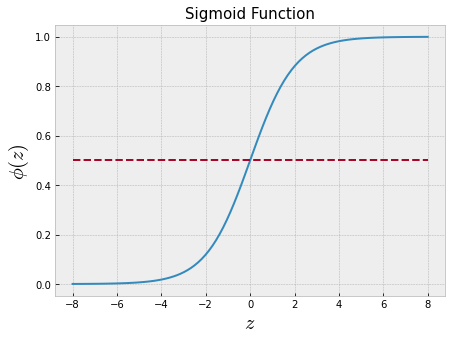

In [8]:
z = np.linspace(-8,8,100)

plt.figure(figsize=(7,5))
plt.plot(z, 1/(1+np.exp(-z)))
plt.plot(z, [0.5]*len(z),'--')
plt.xlabel('$z$',size=20); plt.ylabel('$\phi(z)$',size=20);
plt.title('Sigmoid Function',size=15);

* We can see that $\phi(z)\rightarrow 1$ as $z\rightarrow\infty$, since $\exp(-z)$ becomes very small for large values of $z$.

* Similarly, $\phi(z)\rightarrow 0$ as $z\rightarrow -\infty$ as the result of an increasingly large denominator. 

Thus, we conclude that this sigmoid function takes real number values as input and transforms them to values in the range $[0, 1]$ with an intercept at $\phi(z)=0.5$.

This is the same as using a sigmoid function as the **activation function** in the perceptron diagram.